In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [96]:
Current_data = pd.read_csv('1.04.+Real-life+example.csv')


In [97]:
Current_data = Current_data.dropna()

In [98]:
Current_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


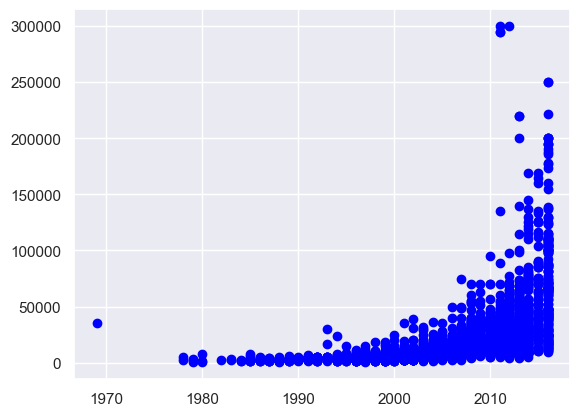

In [99]:
plt.scatter(Current_data.Year, Current_data.Price, color='blue')
plt.show()

In [100]:
categorical_cols = ['Brand', 'Body', 'Engine Type', 'Registration']
df_encoded = pd.get_dummies(Current_data, columns=categorical_cols, drop_first=True)

In [101]:
df_encoded

,Price,Mileage,EngineV,Year,Model,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,320,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,1999,Sprinter 212,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,2003,S 500,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,2007,Q7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,2011,Rav 4,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,Corolla,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
4340,125000.0,9,3.0,2014,S 350,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4341,6500.0,1,3.5,1999,535,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
4342,8000.0,194,2.0,1985,520,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [102]:
X = df_encoded.drop(['Price', 'Model'], axis=1)
X

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,35,1.6,2014,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
4340,9,3.0,2014,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4341,1,3.5,1999,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
4342,194,2.0,1985,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [103]:
y = df_encoded['Price']
y

0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
4339     17900.0
4340    125000.0
4341      6500.0
4342      8000.0
4344     13500.0
Name: Price, Length: 4025, dtype: float64

In [104]:
model = LinearRegression()

In [105]:
model.fit(X,y)

LinearRegression()

In [106]:
predicted_prices = model.predict(X)

In [107]:
predicted_prices

array([ -507.97637927,  4303.04025993, 12397.90674611, ...,
       26131.4854855 , -1200.83005551, 20891.26630477])

In [108]:
final_df = Current_data.copy()

In [109]:
final_df['Predicted Price'] = predicted_prices

In [110]:
final_df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Predicted Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,-507.976379
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,4303.040260
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,12397.906746
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,30379.675020
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,34338.183340
...,...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,29224.263340
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,49825.263485
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,26131.485486
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,-1200.830056


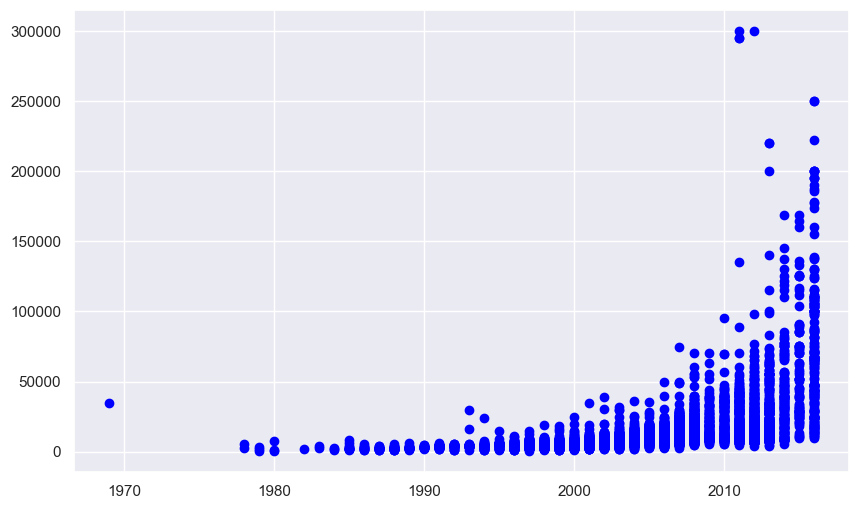

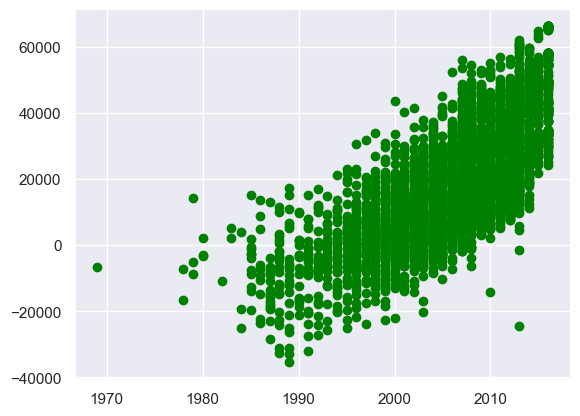

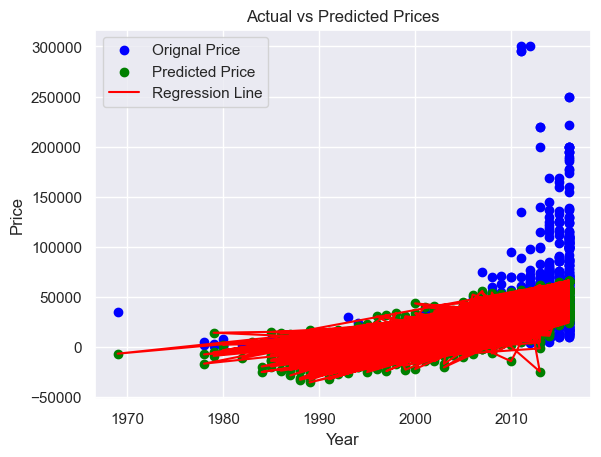

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(final_df['Year'], final_df['Price'], color='Blue', label='Orignal Price')
plt.show()
plt.scatter(final_df['Year'], final_df['Predicted Price'], color='Green', label='Predicted Price')
plt.show()
plt.scatter(final_df['Year'], final_df['Price'], color='Blue', label='Orignal Price')
plt.scatter(final_df['Year'], final_df['Predicted Price'], color='Green', label='Predicted Price')
plt.plot(final_df['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()